In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import os


In [ ]:
merged_dir = "../../../data/merged"
train_file_path = os.path.join(merged_dir, "train_data.parquet")
train_data = pd.read_parquet(train_file_path)
test_file_path = os.path.join(merged_dir, "test_data.parquet")
test_data = pd.read_parquet(test_file_path)

In [3]:
# Prepare features and labels
X_train = train_data.drop(columns=['fire','longitude', 'latitude']).to_numpy()
y_train = train_data['fire'].to_numpy()

X_test = test_data.drop(columns=['fire','longitude', 'latitude']).to_numpy()
y_test = test_data['fire'].to_numpy()

In [ ]:
import sys
from pathlib import Path

# Add the folders where the .py files live
sys.path.append(str(Path('../../../code/myModels').resolve()))


# Now import
from kmeans import MyKMeans

In [7]:
X_all = X_train  # all features
y_all = y_train  # class labels

k_list = range(2, 10)  # range of k to test

# ==========================
# 2️⃣ KMeans on ALL data
# ==========================
print("===== KMeans on ALL DATA =====")
km_all = MyKMeans(max_iter=300, random_state=42, verbose=True)
results_all = km_all.fit_k_range(X_all, k_list)


===== KMeans on ALL DATA =====
k=2 → inertia=1774390.5898, silhouette=0.8076
k=3 → inertia=1331603.6713, silhouette=0.5541
k=4 → inertia=1062697.3499, silhouette=0.2801
k=5 → inertia=740830.6022, silhouette=0.3308
k=6 → inertia=659886.7981, silhouette=0.2978
k=7 → inertia=621976.7532, silhouette=0.2853
k=8 → inertia=550417.8690, silhouette=0.2998
k=9 → inertia=455821.7951, silhouette=0.2992


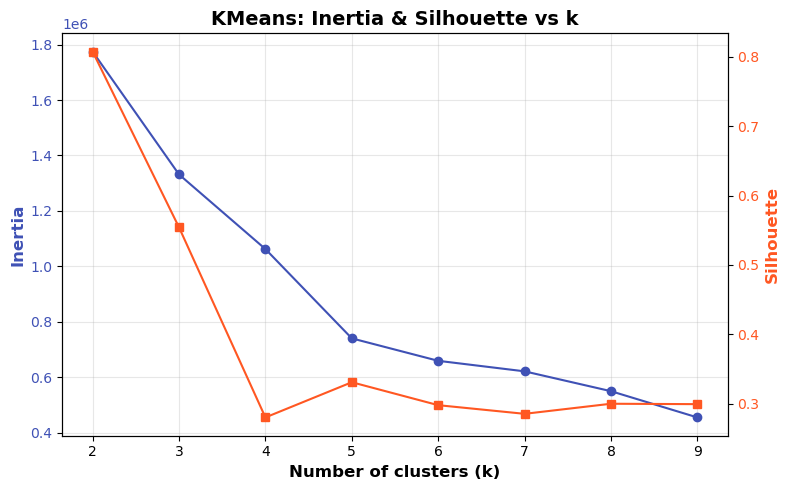

In [8]:
# Collect metrics
inertia_vals = [results_all[k]['inertia'] for k in k_list]
silhouette_vals = [results_all[k]['silhouette'] for k in k_list]

# Plot
fig, ax1 = plt.subplots(figsize=(8,5))

color1 = '#3F51B5'
ax1.set_xlabel('Number of clusters (k)', fontsize=12, weight='bold')
ax1.set_ylabel('Inertia', color=color1, fontsize=12, weight='bold')
ax1.plot(k_list, inertia_vals, '-o', color=color1, label='Inertia')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(alpha=0.3)

ax2 = ax1.twinx()  # second y-axis for silhouette
color2 = '#FF5722'
ax2.set_ylabel('Silhouette', color=color2, fontsize=12, weight='bold')
ax2.plot(k_list, silhouette_vals, '-s', color=color2, label='Silhouette')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('KMeans: Inertia & Silhouette vs k', fontsize=14, weight='bold')
fig.tight_layout()
plt.show()



Best k for all data (by silhouette): 4
Converged at iteration 10, shift=0.000000


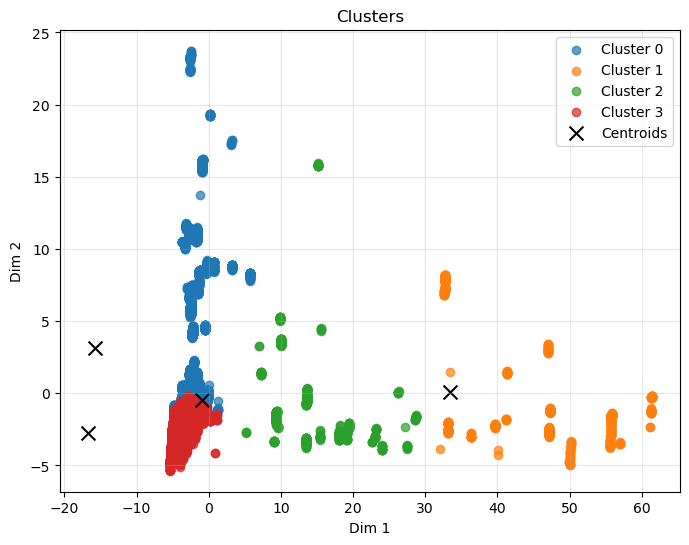

In [9]:
# Best k by silhouette
best_k_all = 4
print(f"\nBest k for all data (by silhouette): {best_k_all}")

# Fit KMeans with best k
km_all_best = MyKMeans(n_clusters=best_k_all, max_iter=300, random_state=42, verbose=True)
km_all_best.fit(X_all)

# Plot clusters
km_all_best.plot_clusters(X_all, reducer='pca')


===== KMeans for CLASS 0 =====
k=2 → inertia=1621446.3264, silhouette=0.8062
k=3 → inertia=1192819.3147, silhouette=0.4572
k=4 → inertia=1067540.5377, silhouette=0.2557
k=5 → inertia=668497.1257, silhouette=0.3229
k=6 → inertia=600573.7398, silhouette=0.2961
k=7 → inertia=568176.6611, silhouette=0.2868
k=8 → inertia=539270.5264, silhouette=0.3019
k=9 → inertia=449187.7026, silhouette=0.3011


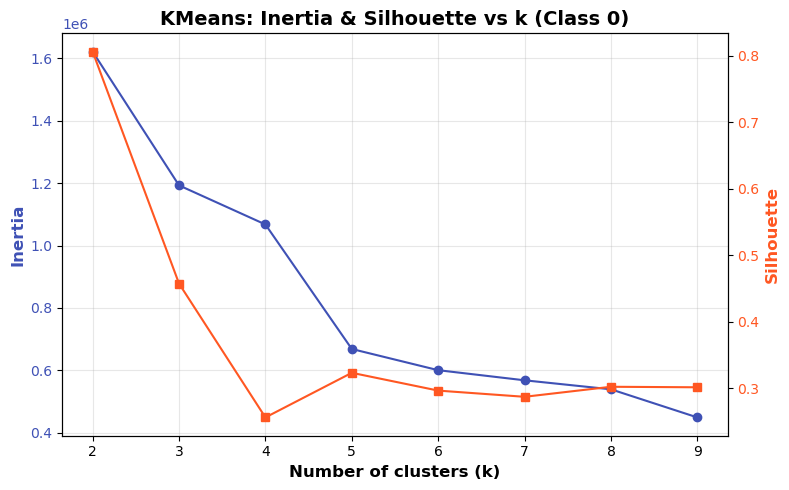


===== KMeans for CLASS 1 =====
k=2 → inertia=160224.2547, silhouette=0.4152
k=3 → inertia=150047.9906, silhouette=0.2350
k=4 → inertia=147476.8966, silhouette=0.1874
k=5 → inertia=63346.8365, silhouette=0.3037
k=6 → inertia=60979.1143, silhouette=0.3111
k=7 → inertia=48199.9267, silhouette=0.3220
k=8 → inertia=45645.0668, silhouette=0.3399
k=9 → inertia=37601.0794, silhouette=0.3425


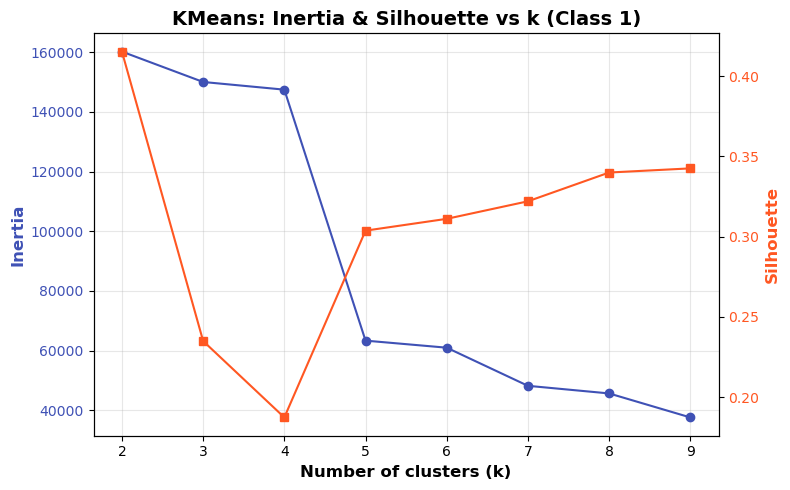

In [10]:
# Loop over classes
for class_label in np.unique(y_all):
    print(f"\n===== KMeans for CLASS {class_label} =====")
    X_class = X_all[y_all == class_label]

    km_class = MyKMeans(max_iter=300, random_state=42, verbose=True)
    results_class = km_class.fit_k_range(X_class, k_list)

    # Collect metrics
    inertia_vals = [results_class[k]['inertia'] for k in k_list]
    silhouette_vals = [results_class[k]['silhouette'] for k in k_list]

    # Plot
    fig, ax1 = plt.subplots(figsize=(8,5))
    
    color1 = '#3F51B5'
    ax1.set_xlabel('Number of clusters (k)', fontsize=12, weight='bold')
    ax1.set_ylabel('Inertia', color=color1, fontsize=12, weight='bold')
    ax1.plot(k_list, inertia_vals, '-o', color=color1, label='Inertia')
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.grid(alpha=0.3)

    ax2 = ax1.twinx()  # second y-axis for silhouette
    color2 = '#FF5722'
    ax2.set_ylabel('Silhouette', color=color2, fontsize=12, weight='bold')
    ax2.plot(k_list, silhouette_vals, '-s', color=color2, label='Silhouette')
    ax2.tick_params(axis='y', labelcolor=color2)

    plt.title(f'KMeans: Inertia & Silhouette vs k (Class {class_label})', fontsize=14, weight='bold')
    fig.tight_layout()
    plt.show()



Best k for class 0 (by silhouette): 4
Converged at iteration 21, shift=0.000000


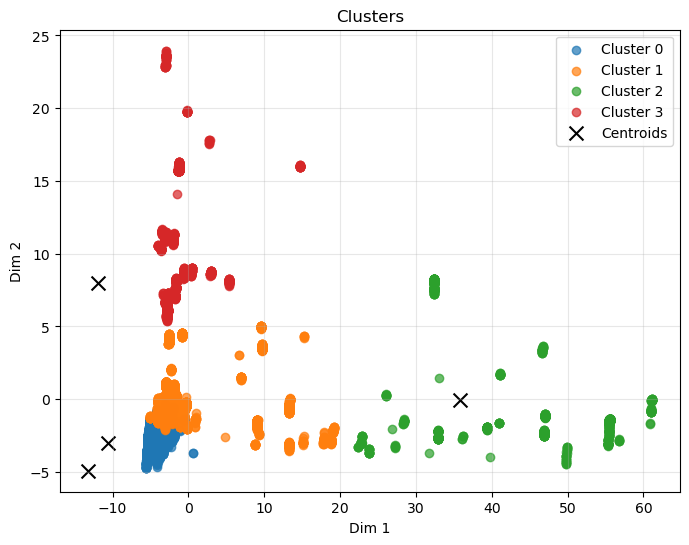


Best k for class 1 (by silhouette): 4
Converged at iteration 9, shift=0.000000


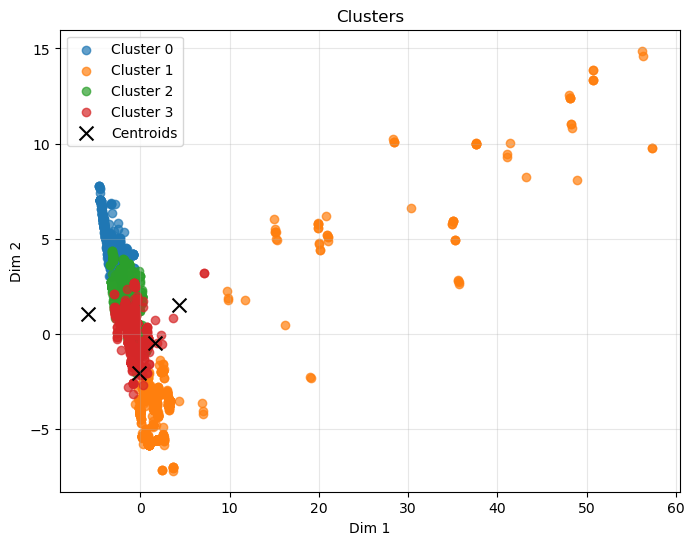

In [11]:
# ==========================
# KMeans BY CLASS with chosen k
# ==========================
# Replace best_k_class_dict with your chosen k for each class
best_k_class_dict = {
    0: 4,  # class 0 best k
    1: 4,  # class 1 best k
}

for class_label, best_k in best_k_class_dict.items():
    print(f"\nBest k for class {class_label} (by silhouette): {best_k}")
    X_class = X_all[y_all == class_label]

    km_class_best = MyKMeans(n_clusters=best_k, max_iter=300, random_state=42, verbose=True)
    km_class_best.fit(X_class)
    km_class_best.plot_clusters(X_class, reducer='pca')